In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

## 
loading the csv file

In [2]:
data=pd.read_csv("house_price.csv")

## inspect the dataframe

In [3]:
data.head()

,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,...,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,price
0,4,3.25,3020,13457,1.0,0,0,5,9,3020,...,1956,0,98133,47.7174,-122.336,2120,7553,1,16477,808100
1,4,2.50,2550,7500,1.0,0,0,3,8,1750,...,1976,0,98023,47.3165,-122.386,2260,8800,0,10050,277500
2,3,2.50,2370,4324,2.0,0,0,3,8,2370,...,2006,0,98038,47.3515,-121.999,2370,4348,0,6694,404000
3,2,1.00,820,3844,1.0,0,0,4,6,820,...,1916,0,98133,47.7049,-122.349,1520,3844,0,4664,300000
4,2,1.50,1400,4050,1.0,0,0,4,8,1400,...,1954,0,98115,47.6768,-122.269,1900,5940,0,5450,699000


In [4]:
data.tail()

,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,...,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,price
21608,4,2.50,2303,3826,2.0,0,0,3,8,2303,...,2006,0,98092,47.3258,-122.165,2516,4500,0,6129,300000
21609,4,2.50,3490,5000,2.0,0,0,3,8,3490,...,2003,0,98042,47.3772,-122.127,2910,5025,0,8490,320000
21610,4,2.75,2790,5527,2.0,0,0,3,8,2790,...,2014,0,98045,47.4827,-121.773,2620,5509,0,8317,483453
21611,2,2.00,1440,15000,1.0,0,0,3,7,1440,...,1985,0,98072,47.7648,-122.159,1780,15000,0,16440,365000
21612,3,1.00,970,5922,1.5,0,0,3,7,970,...,1949,0,98125,47.7190,-122.321,1730,6128,0,6892,354950


## shape of the dataset

In [5]:
data.shape

(21613, 21)

In [6]:
## check for the null values

In [7]:
data.isnull().sum()

room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
price               0
dtype: int64

## check for the duplicate values

In [8]:
data.duplicated().sum()

5

## checking for outliers

<Axes: >

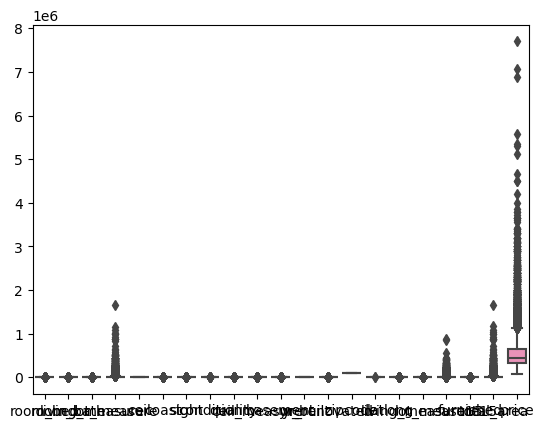

In [9]:
sn.boxplot(data)

 there are outliers

## correlation targets with features
heatmap

<Axes: >

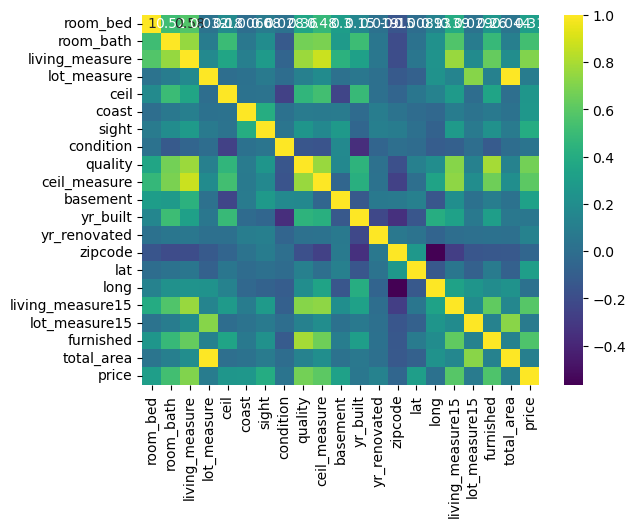

In [10]:
corr=data.corr()
sn.heatmap(corr,cmap='viridis',annot=True)

## extract the feature and target

In [11]:
x=data.iloc[:,:-1]
y=data.price
x

,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,4,3.25,3020,13457,1.0,0,0,5,9,3020,0,1956,0,98133,47.7174,-122.336,2120,7553,1,16477
1,4,2.50,2550,7500,1.0,0,0,3,8,1750,800,1976,0,98023,47.3165,-122.386,2260,8800,0,10050
2,3,2.50,2370,4324,2.0,0,0,3,8,2370,0,2006,0,98038,47.3515,-121.999,2370,4348,0,6694
3,2,1.00,820,3844,1.0,0,0,4,6,820,0,1916,0,98133,47.7049,-122.349,1520,3844,0,4664
4,2,1.50,1400,4050,1.0,0,0,4,8,1400,0,1954,0,98115,47.6768,-122.269,1900,5940,0,5450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,4,2.50,2303,3826,2.0,0,0,3,8,2303,0,2006,0,98092,47.3258,-122.165,2516,4500,0,6129
21609,4,2.50,3490,5000,2.0,0,0,3,8,3490,0,2003,0,98042,47.3772,-122.127,2910,5025,0,8490
21610,4,2.75,2790,5527,2.0,0,0,3,8,2790,0,2014,0,98045,47.4827,-121.773,2620,5509,0,8317
21611,2,2.00,1440,15000,1.0,0,0,3,7,1440,0,1985,0,98072,47.7648,-122.159,1780,15000,0,16440


## splitting the data

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=20)

## standardrizing the data

In [13]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

## determining the k value

In [14]:
data.shape

(21613, 21)

In [15]:
np.sqrt(21613)

147.0136048126159

so nearest integer is 147

## model training using knn

In [16]:
knn_147E=KNeighborsRegressor(n_neighbors=147)
knn_147E.fit(x_train_scaled,y_train)

KNeighborsRegressor(n_neighbors=147)

## model testing using knn

In [17]:
y_pred_knn_147E=knn_147E.predict(x_test_scaled)
data_error= pd.DataFrame()
data_error["y_test"]=y_test
data_error["y_pred_knn_147E"]=y_pred_knn_147E
data_error.head()

,y_test,y_pred_knn_147E
2212,565000,5.304728e+05
16859,547000,5.467827e+05
21053,300000,3.011001e+05
7757,3120000,1.637732e+06
12278,760000,9.440584e+05


## metric evaluation for knn

In [18]:
mae_knn_147E=mean_absolute_error(y_test,y_pred_knn_147E)
mae_knn_147E

102594.64465971445

In [19]:
mse_knn_147E=mean_squared_error(y_test,y_pred_knn_147E)
mse_knn_147E

36715245241.98559

In [20]:
r2_knn_147E=r2_score(y_test,y_pred_knn_147E)
r2_knn_147E

0.7049949070886106

## model optimizing for knn
## k=146

In [21]:
knn_146E=KNeighborsRegressor(n_neighbors=146)
knn_146E.fit(x_train_scaled,y_train)

KNeighborsRegressor(n_neighbors=146)

In [22]:
y_pred_knn_146E=knn_146E.predict(x_test_scaled)

In [23]:
mae_knn_146E=mean_absolute_error(y_test,y_pred_knn_146E)
mae_knn_146E

102544.50230845524

In [24]:
mse_knn_146E=mean_squared_error(y_test,y_pred_knn_146E)
mse_knn_146E

36692470919.63209

In [25]:
r2_knn_146E=r2_score(y_test,y_pred_knn_146E)
r2_knn_146E

0.7051778975885408

## k=148

In [26]:
knn_148E=KNeighborsRegressor(n_neighbors=148)
knn_148E.fit(x_train_scaled,y_train) 

KNeighborsRegressor(n_neighbors=148)

In [27]:
y_pred_knn_148E=knn_148E.predict(x_test_scaled)

In [28]:
mae_knn_148E=mean_absolute_error(y_test,y_pred_knn_148E)
mae_knn_148E

102652.04380247701

In [29]:
mse_knn_148E=mean_squared_error(y_test,y_pred_knn_148E)
mse_knn_148E

36752317907.37438

In [30]:
r2_knn_148E=r2_score(y_test,y_pred_knn_148E)
r2_knn_148E

0.7046970301433414

## mahattan distance

In [31]:
knn_146M=KNeighborsRegressor(n_neighbors=146,metric="chebyshev")
knn_146M.fit(x_train_scaled,y_train)

KNeighborsRegressor(metric='chebyshev', n_neighbors=146)

In [32]:
y_pred_knn_146M=knn_146M.predict(x_test_scaled)

In [33]:
mae_knn_146M=mean_absolute_error(y_test,y_pred_knn_146M)
mae_knn_146M

123598.40995757005

In [34]:
mse_knn_146M=mean_squared_error(y_test,y_pred_knn_146M)
mse_knn_146M

49002647171.56915

In [35]:
r2_knn_146M=r2_score(y_test,y_pred_knn_146M)
r2_knn_146M

0.606266269325592

In [36]:
MAE=[mae_knn_146E,mae_knn_147E,mae_knn_148E,mae_knn_146M]
MSE=[mse_knn_146E,mse_knn_147E,mse_knn_148E,mse_knn_146M]
R2_Score=[r2_knn_146E,r2_knn_147E,r2_knn_148E,r2_knn_146M]
models=["KNN with 146E","KNN with 147E","KNN with 148E","KNN with 146M"]


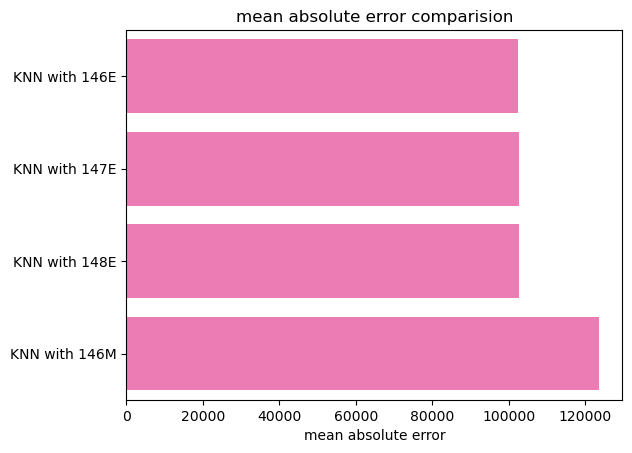

In [37]:
sn.barplot(x=MAE,y=models,color='hotpink')
plt.xlabel("mean absolute error")
plt.title("mean absolute error comparision")
plt.show()

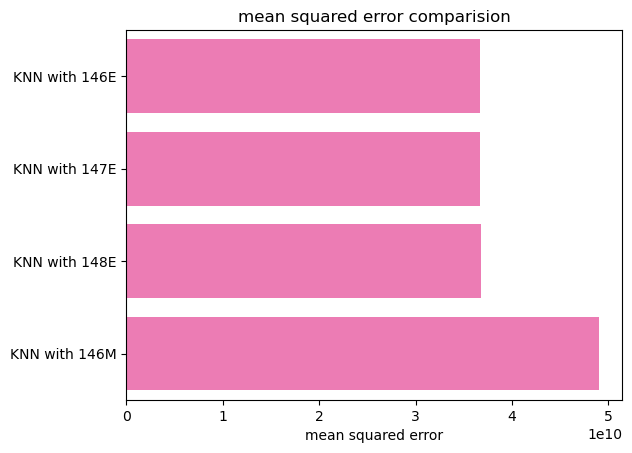

In [38]:
sn.barplot(x=MSE,y=models,color='hotpink')
plt.xlabel("mean squared error")
plt.title("mean squared error comparision")
plt.show()

In [39]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

## model training for linear regression

In [40]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

## model testing for linear regression

In [41]:
y_pred=regressor.predict(x_test)


In [42]:
print(regressor.coef_[0])

-40345.3467412666


In [43]:
print(regressor.intercept_)

9099275.93998436


## error analysis

In [44]:
data_error=pd.DataFrame()
data_error['y_test']=y_test
data_error['y_pred']=y_pred
data_error.head()

,y_test,y_pred
2212,565000,5.375265e+05
16859,547000,5.012712e+05
21053,300000,2.065191e+05
7757,3120000,2.301343e+06
12278,760000,7.984225e+05


## metric evaluation for linear regression

In [45]:
mean_absolute_error(y_test,y_pred)

126950.30672076861

In [46]:
mean_squared_error(y_test,y_pred)

38197983846.54892

In [47]:
mse=mean_squared_error(y_test,y_pred)
np.sqrt(mse)

195443.0450196397

In [48]:
r2_lr=r2_score(y_test,y_pred)

## compare the results

In [49]:
R2_score=[r2_knn_146M,r2_lr]
Models=['linear regression','knn']

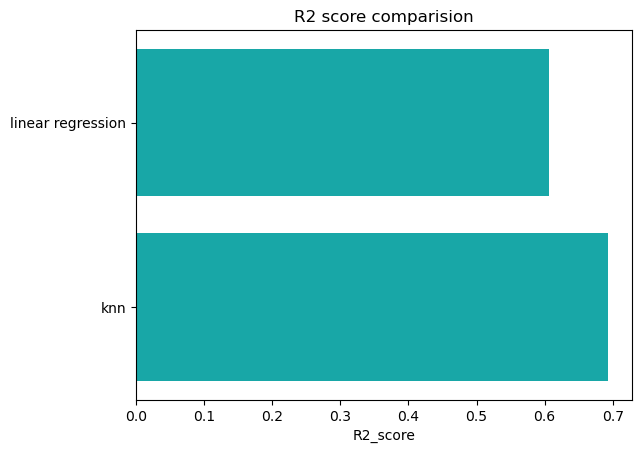

In [50]:
sn.barplot(x=R2_score,y=Models,color="c")
plt.xlabel('R2_score')
plt.title('R2 score comparision')
plt.show()